# Prithvi Models Usage
This notebook demonstrates how to use the Prithvi models for satellite image reconstruction, with simple examples covering all six Prithvi foundation MAE models.

In [28]:
# %pip install geoai-py

## Import Library

In [29]:
import geoai
import matplotlib.pyplot as plt

## List Available Models

In [22]:
models = geoai.get_available_prithvi_models()
models

['Prithvi-EO-2.0-tiny-TL',
 'Prithvi-EO-2.0-100M-TL',
 'Prithvi-EO-2.0-300M',
 'Prithvi-EO-2.0-300M-TL',
 'Prithvi-EO-2.0-600M',
 'Prithvi-EO-2.0-600M-TL']

## Load Models

In [23]:
processor = geoai.load_prithvi_model("Prithvi-EO-2.0-tiny-TL")

#processor_tiny = geoai.load_prithvi_model("Prithvi-EO-2.0-tiny-TL")
#processor_100m = geoai.load_prithvi_model("Prithvi-EO-2.0-100M-TL")
#processor_300m = geoai.load_prithvi_model("Prithvi-EO-2.0-300M")
#processor_300m_tl = geoai.load_prithvi_model("Prithvi-EO-2.0-300M-TL")
#processor_600m = geoai.load_prithvi_model("Prithvi-EO-2.0-600M")
#processor_600m_tl = geoai.load_prithvi_model("Prithvi-EO-2.0-600M-TL")

## Download Sample Data

In [17]:
url = "https://huggingface.co/datasets/giswqs/geospatial/resolve/main/Mexico_HLS_samples.zip"
geoai.download_file(url)

Extracted to: Mexico_HLS_samples


'Mexico_HLS_samples'

## Define Input Files

Specify the paths to the satellite images for processing.

In [18]:
file_paths = [
    "Mexico_HLS_samples/data/Mexico_HLS.S30.T13REM.2018026T173609.v2.0_cropped.tif",
    "Mexico_HLS_samples/data/Mexico_HLS.S30.T13REM.2018106T172859.v2.0_cropped.tif",
    "Mexico_HLS_samples/data/Mexico_HLS.S30.T13REM.2018201T172901.v2.0_cropped.tif",
    "Mexico_HLS_samples/data/Mexico_HLS.S30.T13REM.2018266T173029.v2.0_cropped.tif",
]

## Simple One-Line Inference

Run inference using the simplified API.

In [24]:
geoai.prithvi_inference(file_paths=file_paths, model_name="Prithvi-EO-2.0-tiny-TL", output_dir="results")

## Advanced Processing with Processor

Load the model and process files with custom parameters.

In [21]:
processor = geoai.load_prithvi_model()
output_dir = "results"
processor.process_files(file_paths, output_dir, mask_ratio=0.75)

## Visualize Results

Process images and extract tensors for visualization.

In [25]:
input_tensor, rec_tensor, mask_tensor = processor.process_images(
    file_paths=file_paths,
    mask_ratio=0.75
)

In [26]:
original_rgb, masked_rgb, reconstructed_rgb = processor.visualize_rgb(
    input_tensor, rec_tensor, mask_tensor
)

## Plot Comparison

Display the original, masked, and reconstructed images side by side.

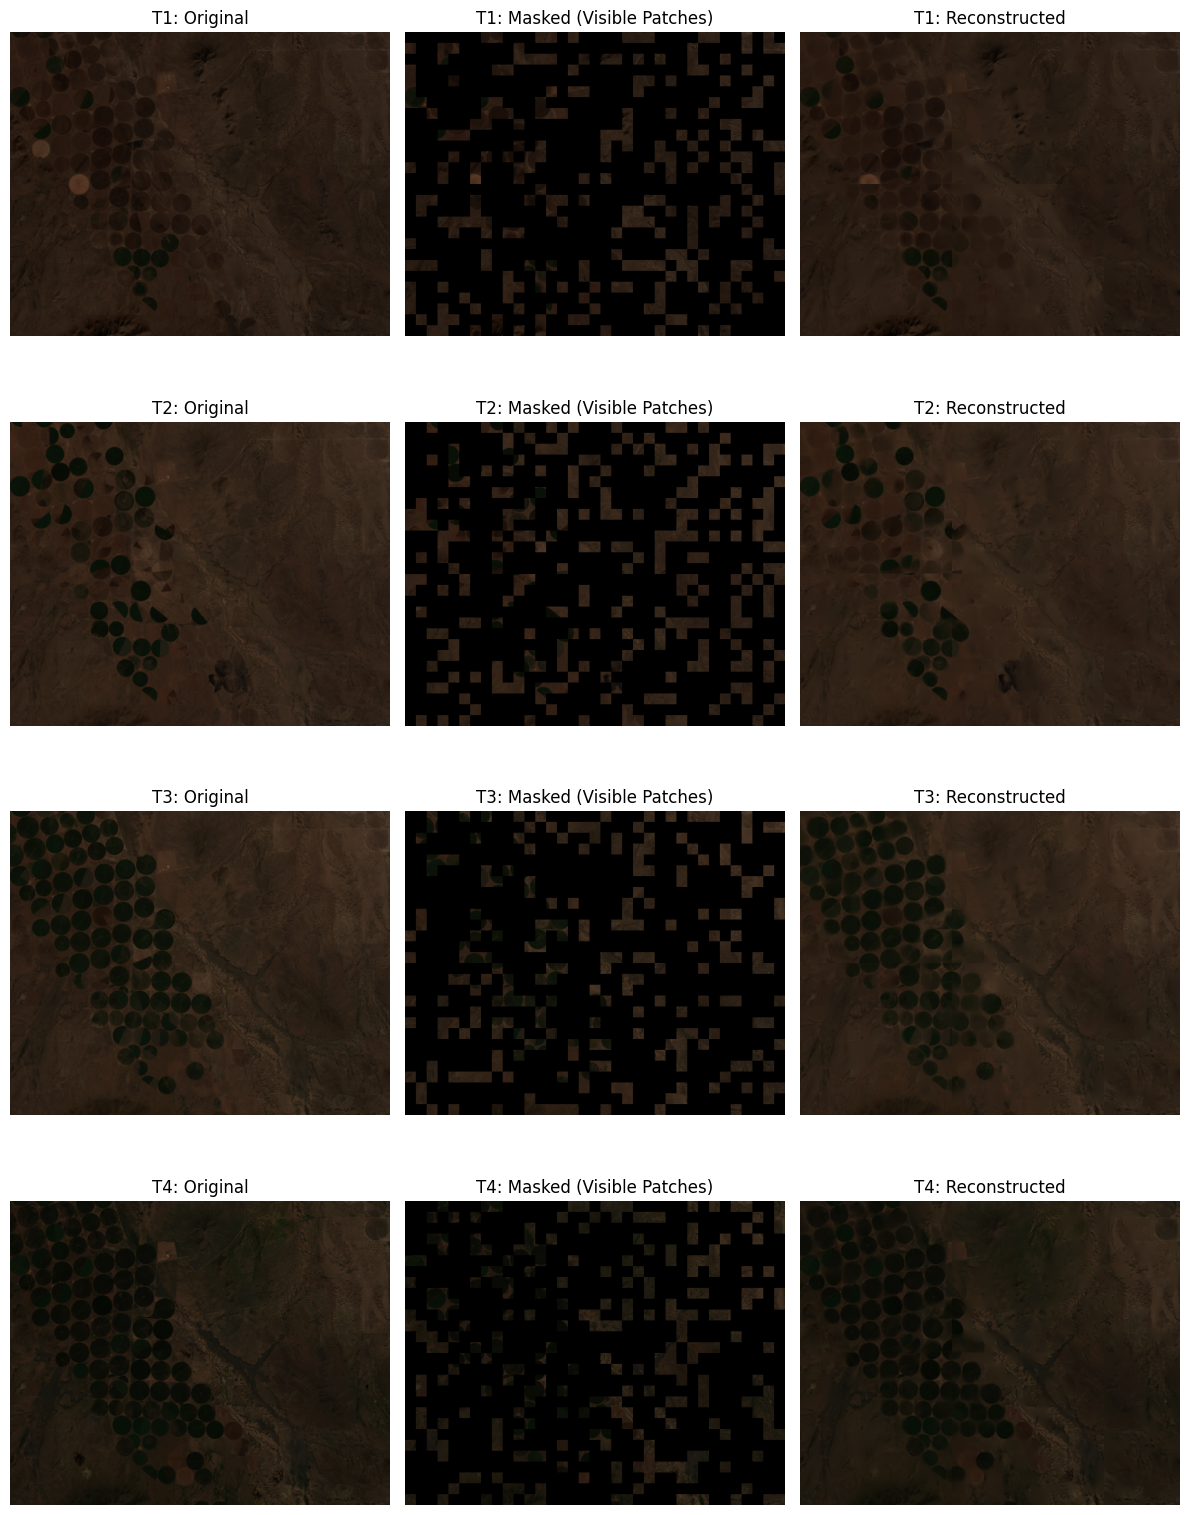

In [27]:
num_timestamps = len(original_rgb)
fig, axes = plt.subplots(num_timestamps, 3, figsize=(12, 4 * num_timestamps))

if num_timestamps == 1:
    axes = axes.reshape(1, -1)

column_titles = ["Original", "Masked (Visible Patches)", "Reconstructed"]

for t in range(num_timestamps):
    axes[t, 0].imshow(original_rgb[t])
    axes[t, 0].set_title(f"T{t+1}: {column_titles[0]}")
    axes[t, 0].axis("off")

    axes[t, 1].imshow(masked_rgb[t])
    axes[t, 1].set_title(f"T{t+1}: {column_titles[1]}")
    axes[t, 1].axis("off")

    axes[t, 2].imshow(reconstructed_rgb[t])
    axes[t, 2].set_title(f"T{t+1}: {column_titles[2]}")
    axes[t, 2].axis("off")

plt.tight_layout()
plt.show()